<a href="https://colab.research.google.com/github/ganeshiimi/AV/blob/master/AV_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/?utm_source=auto-email#ProblemStatement
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
#evaluation metric
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/AV/Janathahack_customer_segmentation')
train=pd.read_csv('Train.csv',encoding= 'unicode_escape')
test=pd.read_csv('Test.csv',encoding= 'unicode_escape')

train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
print('shape train :{0},shape test : {1}'.format(train.shape,test.shape))
print('Duplicate entrees train: {0},Duplicate entrees test: {1}'.format(train.duplicated().sum(),test.duplicated().sum()))
print('null values train: {0},null values test: {1}'.format(train.isnull().sum()/train.shape[0],test.isnull().sum()/test.shape[0]))


shape train :(8068, 11),shape test : (2627, 10)
Duplicate entrees train: 0,Duplicate entrees test: 0
null values train: ID                 0.000000
Gender             0.000000
Ever_Married       0.017353
Age                0.000000
Graduated          0.009668
Profession         0.015369
Work_Experience    0.102752
Spending_Score     0.000000
Family_Size        0.041522
Var_1              0.009420
Segmentation       0.000000
dtype: float64,null values test: ID                 0.000000
Gender             0.000000
Ever_Married       0.019033
Age                0.000000
Graduated          0.009136
Profession         0.014465
Work_Experience    0.102398
Spending_Score     0.000000
Family_Size        0.043015
Var_1              0.012181
dtype: float64


In [ ]:
np.intersect1d(train.ID, test.ID)

array([458989, 458994, 458996, ..., 467954, 467958, 467961])

In [ ]:
for col1,col2 in zip(train,test):
    print(col1,train[col1].dtype)
    print("Train:",train[col1].unique())
    print("Test:",test[col2].unique())
    

ID int64
Train: [462809 462643 466315 ... 465406 467299 461879]
Test: [458989 458994 458996 ... 467960 467961 467968]
Gender object
Train: ['Male' 'Female']
Test: ['Female' 'Male']
Ever_Married object
Train: ['No' 'Yes' nan]
Test: ['Yes' 'No' nan]
Age int64
Train: [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Test: [36 37 69 59 19 47 61 50 22 27 18 20 45 55 88 63 42 79 35 52 29 87 89 31
 72 41 62 56 60 68 57 51 86 74 23 80 78 48 70 83 73 46 43 32 39 71 67 49
 65 33 58 30 21 26 81 28 76 85 66 53 40 25 77 75 82 84 38]
Graduated object
Train: ['No' 'Yes' nan]
Test: ['Yes' 'No' nan]
Profession object
Train: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Test: ['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']
Work

Segmentation,A,B,C,D
Gender,,,,
Female,909,861,922,959
Male,1063,997,1048,1309


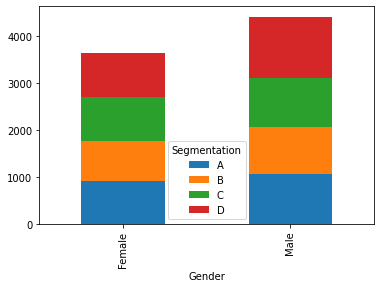

Segmentation,A,B,C,D
Ever_Married,,,,
No,801,479,398,1607
Yes,1137,1348,1549,609


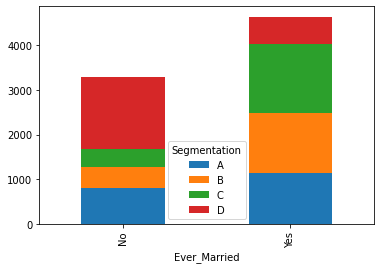

Segmentation,A,B,C,D
Age,,,,
18,3,4,3,122
19,8,1,5,120
20,4,4,8,111
21,3,4,7,102
22,6,5,4,127
...,...,...,...,...
85,9,1,3,9
86,10,7,9,4
87,14,4,9,1


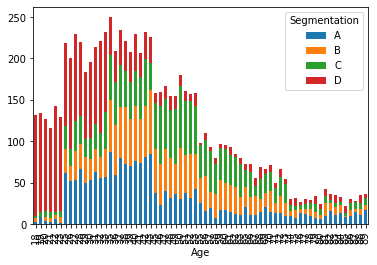

Segmentation,A,B,C,D
Graduated,,,,
No,729,508,348,1437
Yes,1219,1332,1607,810


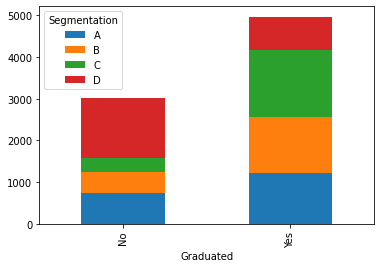

Segmentation,A,B,C,D
Profession,,,,
Artist,558,756,1065,137
Doctor,199,143,140,206
Engineer,259,189,75,176
Entertainment,365,221,148,215
Executive,125,183,175,116
Healthcare,106,101,146,979
Homemaker,73,55,28,90
Lawyer,197,158,140,128
Marketing,57,30,35,170


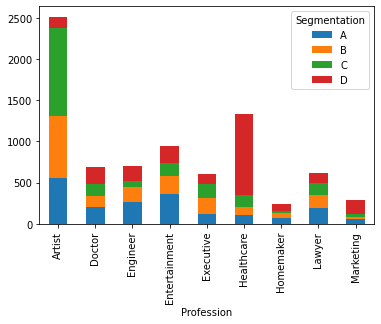

Segmentation,A,B,C,D
Work_Experience,,,,
0.0,542,558,619,599
1.0,578,571,628,577
2.0,63,60,77,86
3.0,58,60,63,74
4.0,52,67,68,66
5.0,50,44,41,59
6.0,49,45,47,63
7.0,52,39,52,53
8.0,121,81,97,164


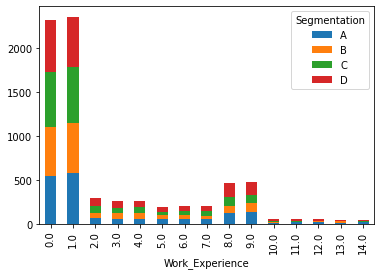

Segmentation,A,B,C,D
Spending_Score,,,,
Average,343,590,903,138
High,271,384,405,156
Low,1358,884,662,1974


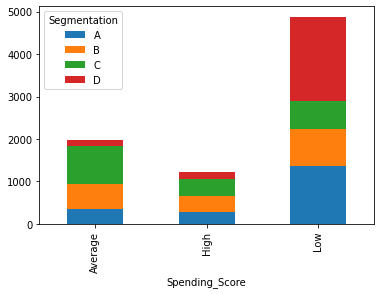

Segmentation,A,B,C,D
Family_Size,,,,
1.0,561,363,140,389
2.0,621,621,774,374
3.0,316,331,391,459
4.0,219,301,391,468
5.0,81,137,149,245
6.0,35,39,43,95
7.0,26,14,14,42
8.0,7,5,13,25
9.0,11,4,11,18


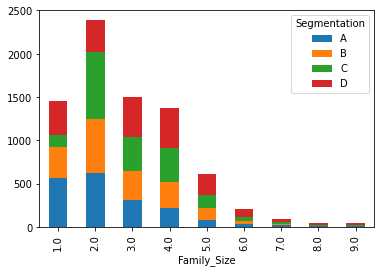

Segmentation,A,B,C,D
Var_1,,,,
Cat_1,31,26,26,50
Cat_2,83,106,99,134
Cat_3,223,186,154,259
Cat_4,333,232,109,415
Cat_5,19,20,18,28
Cat_6,1213,1232,1496,1297
Cat_7,51,43,47,62


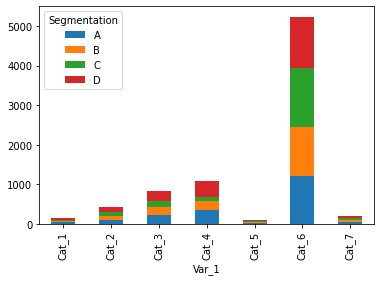

Segmentation,A,B,C,D
Segmentation,,,,
A,1972,0,0,0
B,0,1858,0,0
C,0,0,1970,0
D,0,0,0,2268


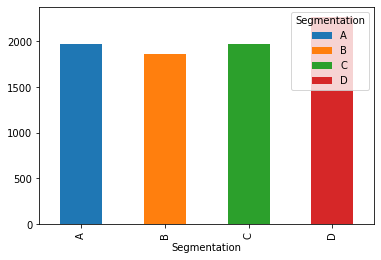

In [ ]:
k=list(train.columns)
k.remove('ID')
y='Segmentation'
top_n=5
for K in k:
    #tab=pd.crosstab(train[K],train[y],margins=True).sort_values('All',ascending=False)
    tab=pd.crosstab(train[K],train[y],margins=True)

    tab = tab.drop('All',axis=1)
    tab = tab.drop('All',axis=0)
    tab[:].plot(kind='bar', stacked=True)
    display(tab)
    plt.show()

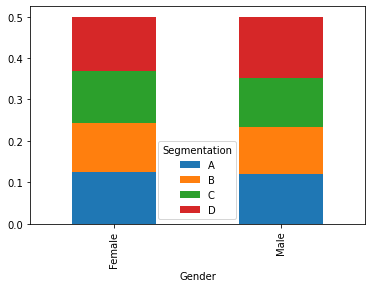

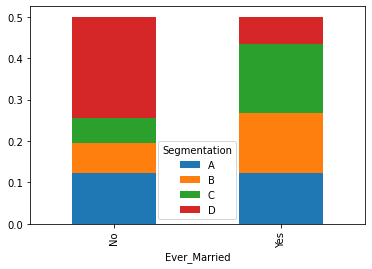

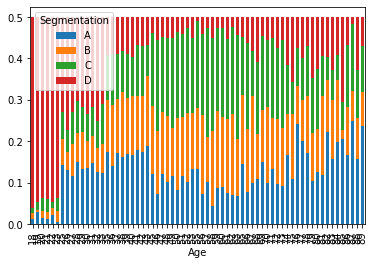

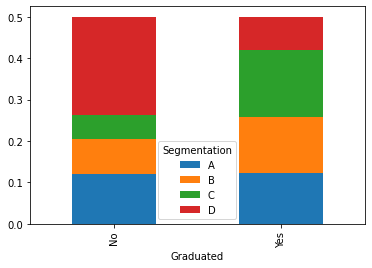

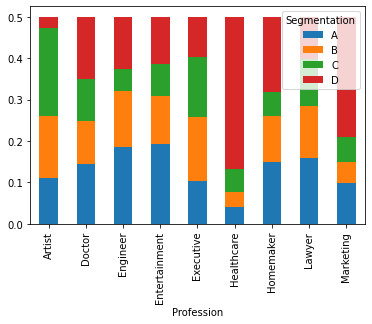

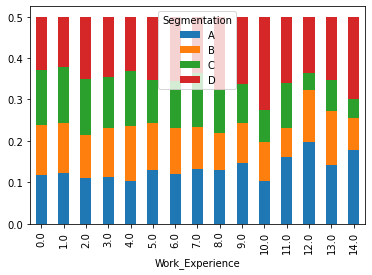

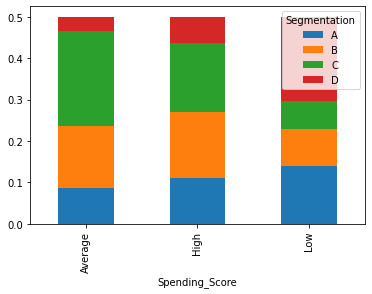

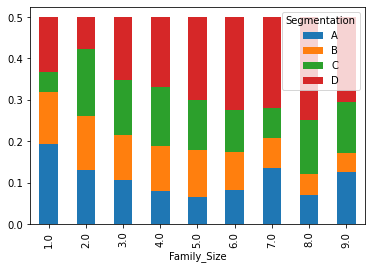

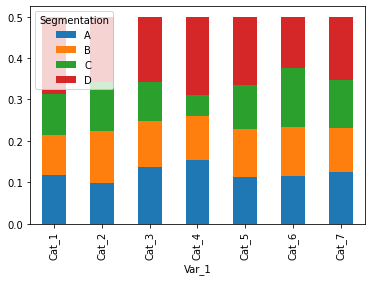

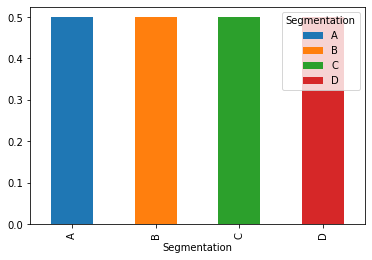

In [ ]:
top_n=5
for K in k:
    tab=pd.crosstab(train[K],train[y],margins=True).apply(lambda r: r/r.sum(), axis=1)
    tab = tab.drop('All',axis=1)
    tab = tab.drop('All',axis=0)
    tab[:].plot(kind='bar', stacked=True)
    plt.show()

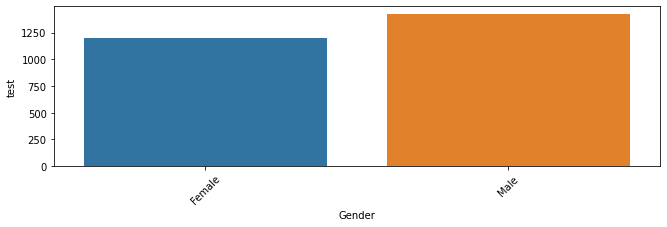

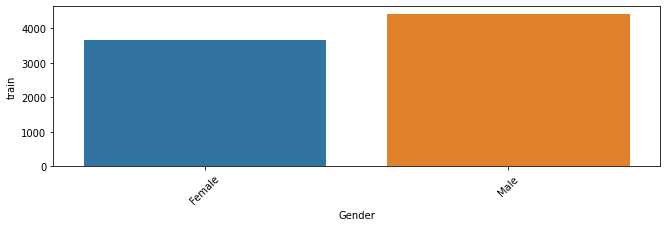

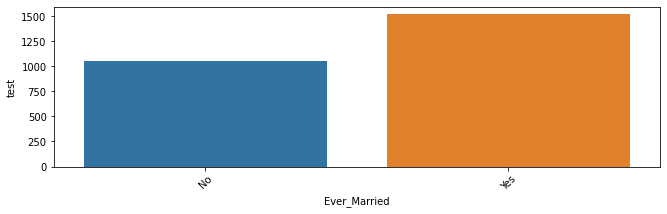

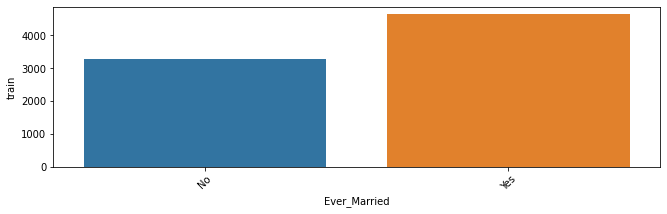

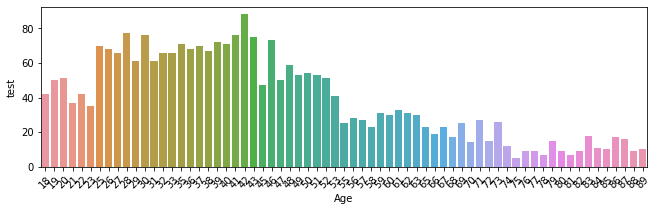

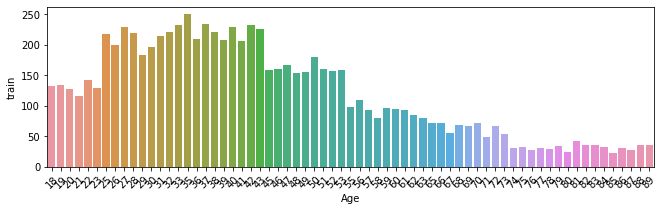

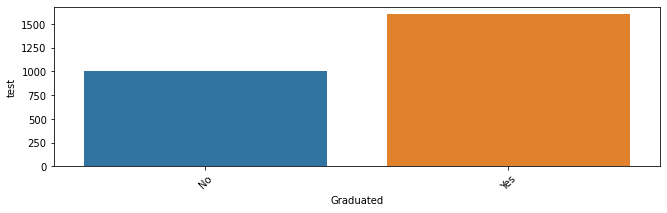

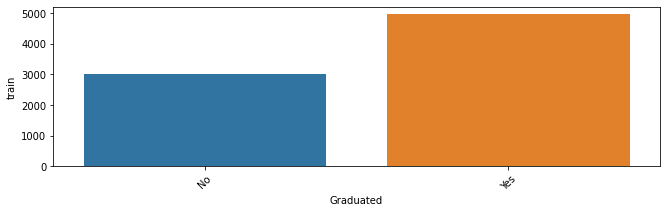

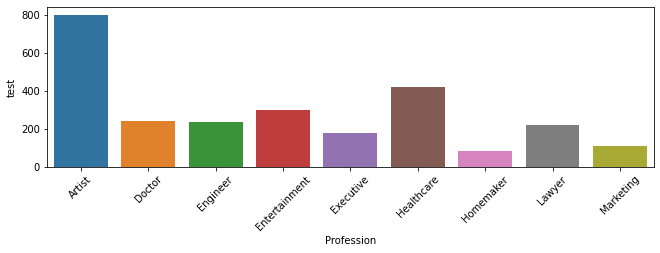

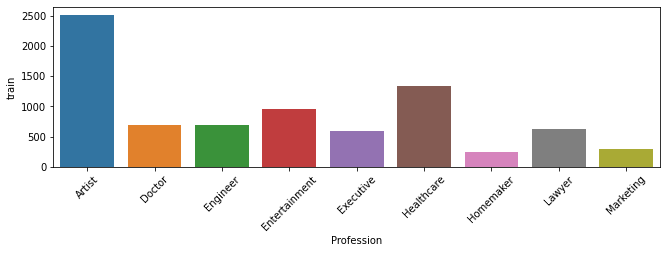

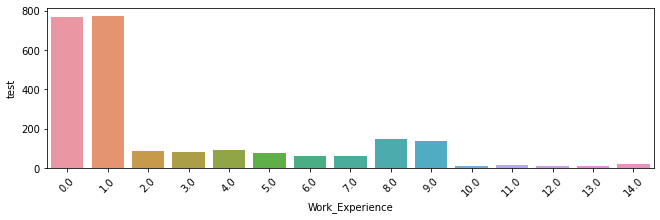

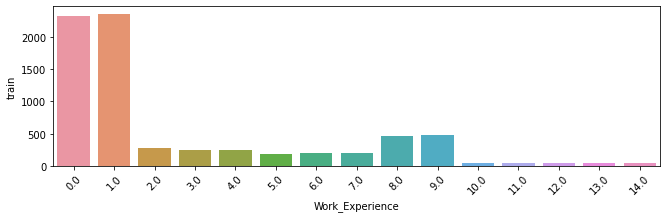

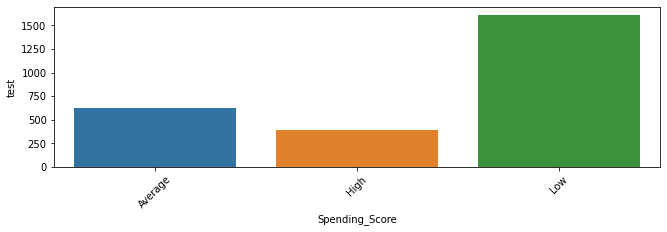

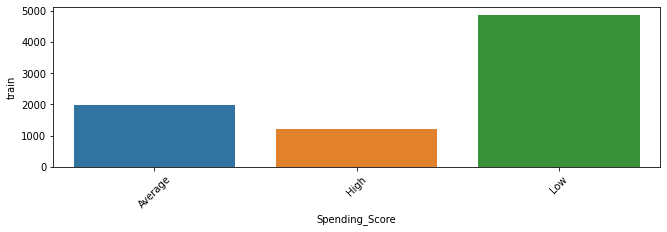

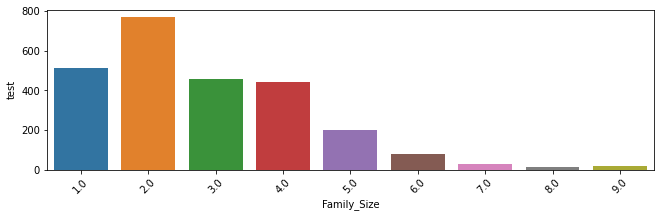

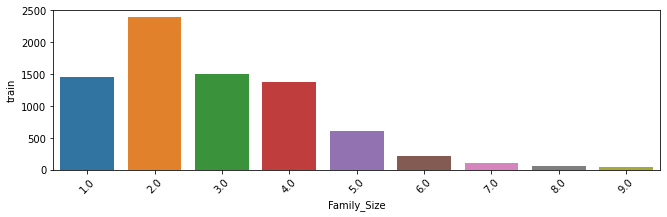

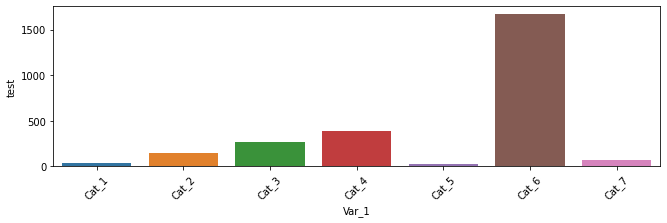

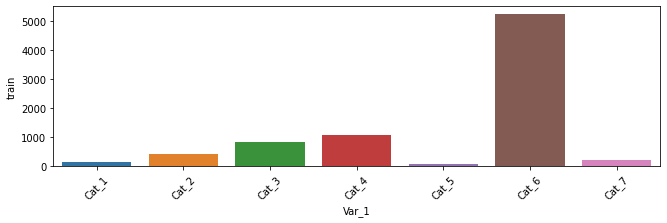

In [ ]:
#remove dependent varaible from list
k=list(train.columns)
k.remove('ID')
y='Segmentation'
k.remove(y)
for i,K in zip(range(len(k)),k):
    x=test[K].sort_values()
    fig1 = plt.figure(figsize=(50, 10))
    fig1=plt.subplot(3,4,i+1)
    ax1=sns.countplot(x)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
    ax1.set(ylabel='test')
    
    y=train[K].sort_values()
    fig2 = plt.figure(figsize=(50, 10))
    fig2=plt.subplot(3,4,i+1)
    ax2=sns.countplot(y)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
    ax2.set(ylabel='train')

1. The final classification is also proportionately distributed. No class 
is skewed in the data
2. For Var1 majority of the customers are in cat_6
3. Most peopke are having family size 2 and they have higher class C segment.Family size 6 and above can be combined
4. Spending score is low for most people.Higher proportion of segment D in low spending score people.
5. Health care proffesionals are predominantly in D segment. Train data is predominantly Artists
6. Lower age group is predominanatly D segment
7. Most of non graduated customers are falling to clasification D
8.Family size,spending score,proffesions,age group,graduation seems to be significant variables
9. Train and test appears to have very similar distribution for all independent variable


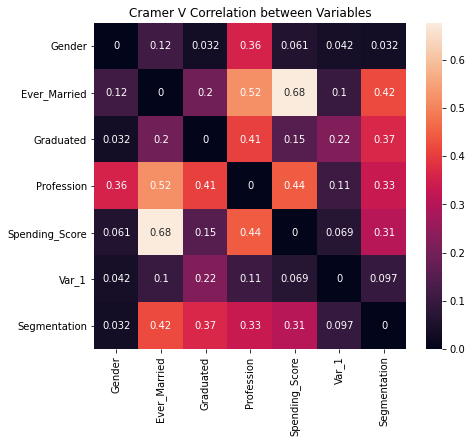

In [ ]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cat_col = [c for i, c in enumerate(train.columns) if train.dtypes[i] in [np.object]]
corrM = np.zeros((len(cat_col),len(cat_col)))
for col1, col2 in itertools.combinations(cat_col, 2):
    idx1, idx2 = cat_col.index(col1), cat_col.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(train[col1], train[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cat_col, columns=cat_col)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");


1. categrorial*catgorical:Lambda,corrected cramersv
2. categorical*continuos: Point Biserial,Logistic regression
3. continuos*continuos:Spearman,Kendall,pearson

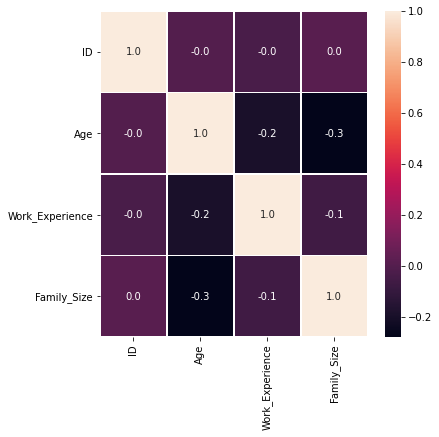

In [ ]:
Continuous_col = [c for i, c in enumerate(train.columns) if train.dtypes[i] in [np.int,np.float]]

f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(train[Continuous_col].corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [ ]:
tab=pd.crosstab(train['Family_Size'],train['Segmentation'],margins=True)
tab.head(40)

Segmentation,A,B,C,D,All
Family_Size,,,,,
1.0,561,363,140,389,1453
2.0,621,621,774,374,2390
3.0,316,331,391,459,1497
4.0,219,301,391,468,1379
5.0,81,137,149,245,612
6.0,35,39,43,95,212
7.0,26,14,14,42,96
8.0,7,5,13,25,50
9.0,11,4,11,18,44


In [ ]:
def missing_imputation(df,miss_base):
  Misisng_value_fields=['Ever_Married','Graduated','Profession','Work_Experience','Family_Size','Var_1']
  for col in Misisng_value_fields:
    df[col]=df.groupby(miss_base)[col].apply(lambda x:x.fillna(x.value_counts().index.tolist()[0]))
  return(df)  

train=missing_imputation(train,'Segmentation')
test=missing_imputation(test,'Gender')
df_combined=pd.concat([train,test],axis=0,sort=False)
df_combined.reset_index(drop=True, inplace=True)

In [ ]:

def data_feature(df):
  # bins=[0,23.5,27.5,33.5,43.5,73.5,90]
  # group=[21,25,30,37,50,80]
  # df['Age']=pd.cut(df['Age'], bins, labels=group)
  # df['Age']=df['Age'].astype(int)
  # for i in range(0,len(df)):
  #   if df['Work_Experience'][i] >1 and df['Work_Experience'][i] <8:
  #       df['Work_Experience'][i] = 5
  #   elif df['Work_Experience'][i] >9:
  #       df['Work_Experience'][i] = 10
  for i in range(0,len(df)):
    if df['Family_Size'][i] >5:
        df['Family_Size'][i] = 7
  df['Spending_Score'].replace(['Low','Average','High'],[-1,0,1], inplace=True)
  df['Graduated'].replace(['No','Yes'],[0,1], inplace=True)
  df['Ever_Married'].replace(['No','Yes' ],[0,1], inplace=True)
  df['Gender'].replace(['Female','Male' ],[0,1], inplace=True)
  
  # temp= df['Var_1'].value_counts()
  # df['Var_1_count'] = df['Var_1'].apply(lambda x: temp[x])
  # for i in range(0, len(df)):
  #     if df['Var_1_count'].iloc[i] < 500:
  #         df['Var_1'][i] = 'other'
  # df=df.drop(['Var_1_count'], axis=1)
  return(df)


df_combined=data_feature(df_combined).copy(deep=True)
df_combined['Age-Workex']=df_combined['Age']-df_combined['Work_Experience']
df_combined['Spend_score_family_size']=df_combined['Spending_Score']/df_combined['Family_Size']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#one hot encoding
K=list(df_combined.columns)
sub_id=test['ID']
unwanted_ele = {'Segmentation','ID'} 
K = [ele for ele in K if ele not in unwanted_ele] 
  
df_encoded = pd.get_dummies(df_combined[K],prefix_sep='_',drop_first=True)

scaler = StandardScaler()

K = ['Age','Family_Size','Work_Experience','Age-Workex','Spend_score_family_size'] 

for k in K:
    df_encoded[[k]] = scaler.fit_transform(df_encoded[[k]])

df_encoded['Segmentation']=df_combined['Segmentation']
train=df_encoded[df_encoded['Segmentation'].notnull()]
test=df_encoded[df_encoded['Segmentation'].isnull()]


In [ ]:
print(train.shape,test.shape,df_encoded.shape)

(8068, 24) (2627, 24) (10695, 24)


In [ ]:
train.head(5)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Age-Workex,Spend_score_family_size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,1,0,-1.282499,0,-0.432287,-1,0.755885,-1.139668,0.037244,0,0,0,0,1,0,0,0,0,0,1,0,0,0,D
1,0,1,-0.328606,1,-0.432287,0,0.100233,-0.232345,0.607620,0,1,0,0,0,0,0,0,0,0,1,0,0,0,A
2,0,1,1.400325,1,-0.432287,-1,-1.211071,1.412177,-1.673884,0,1,0,0,0,0,0,0,0,0,0,0,1,0,B
3,1,1,1.400325,1,-0.737879,1,-0.555419,1.468885,1.748372,0,0,0,0,0,0,1,0,0,0,0,0,1,0,B
4,0,1,-0.209369,1,-0.432287,1,2.722842,-0.118930,0.933549,0,0,1,0,0,0,0,0,0,0,0,0,1,0,A


In [ ]:
df_y=train['Segmentation']
df_train=train.drop(['Segmentation'], axis=1)
df_test=test.drop(['Segmentation'], axis=1)


In [ ]:
# #Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
# pca = PCA().fit(df_train)
# #Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)')
# plt.title('Explained Variance')

# # We want to preserve 95% of the variance so plot a horizontal line at 95% variance
# plt.axhline(y=95, color='r', linestyle='--')
# plt.show()


# # transforming the original train and validation set to  components

# # fit on the training data
# pca = PCA(15).fit(df_train)

# # transform both training and validation data
# df_train = pd.DataFrame(pca.transform(df_train))
# df_test = pd.DataFrame(pca.transform(df_test))
# # checking shape of data after PCA
# df_train.shape

In [ ]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Age-Workex,Spend_score_family_size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,-1.282499,0,-0.432287,-1,0.755885,-1.139668,0.037244,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,-0.328606,1,-0.432287,0,0.100233,-0.232345,0.607620,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,1.400325,1,-0.432287,-1,-1.211071,1.412177,-1.673884,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,1.400325,1,-0.737879,1,-0.555419,1.468885,1.748372,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,-0.209369,1,-0.432287,1,2.722842,-0.118930,0.933549,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
def cv_score(ml_model, rstate = 11,cols = df_train.columns):
    i = 1
    cv_scores = []
    df1 = df_train.copy()
    df1 = df_train[cols]
    
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(df1,df_y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[train_index],df1.loc[test_index]
        ytr,yvl = df_y[train_index],df_y[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        #RMSE
        #rmse_score_train = sqrt(mean_squared_error(ytr, train_val))
        #rmse_score = sqrt(mean_squared_error(yvl, pred_val))
        #F1 SCORE
        f1score=f1_score(yvl, pred_val,average='micro')
        #
        sufix = ""
        msg = ""
        #RMSE
        #msg += "Train RMSE: {:.5f} ".format(rmse_score_train)
        #msg += "Valid RMSE: {:.5f}".format(rmse_score)
        #F1 SCORE
        msg += "Valid F1 Score: {}".format(f1score)
        
        print("{}".format(msg))
        # Save scores
        #RMSE
        #cv_scores.append(rmse_score)
        #F1 SCORE
        cv_scores.append(f1score)
        i+=1
       
    return cv_scores

In [ ]:
logreg_scores = cv_score(LogisticRegression(solver='lbfgs'))



1 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Valid F1 Score: 0.5080545229244114

2 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Valid F1 Score: 0.5291201982651796

3 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Valid F1 Score: 0.5322180916976456

4 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Valid F1 Score: 0.5120892746435214

5 of kfold 5
Valid F1 Score: 0.5083694978301302


In [ ]:
dtree_scores = cv_score(DecisionTreeClassifier(min_samples_leaf=25, min_samples_split=25))


1 of kfold 5
Valid F1 Score: 0.4721189591078067

2 of kfold 5
Valid F1 Score: 0.4993804213135068

3 of kfold 5
Valid F1 Score: 0.5074349442379182

4 of kfold 5
Valid F1 Score: 0.5052696838189709

5 of kfold 5
Valid F1 Score: 0.5120892746435214


In [ ]:
RF_scores = cv_score(RandomForestClassifier(n_estimators=100, max_depth=12))


1 of kfold 5
Valid F1 Score: 0.523543990086741

2 of kfold 5
Valid F1 Score: 0.5359355638166047

3 of kfold 5
Valid F1 Score: 0.5297397769516728

4 of kfold 5
Valid F1 Score: 0.5331680099194048

5 of kfold 5
Valid F1 Score: 0.5331680099194048


In [ ]:
XGBM_scores = cv_score(XGBClassifier(n_estimators=100, max_depth=12))


1 of kfold 5
Valid F1 Score: 0.4962825278810409

2 of kfold 5
Valid F1 Score: 0.48203221809169766

3 of kfold 5
Valid F1 Score: 0.5080545229244114

4 of kfold 5
Valid F1 Score: 0.49473031618102914

5 of kfold 5
Valid F1 Score: 0.5052696838189709


In [ ]:
KNN_scores = cv_score(KNeighborsClassifier(n_neighbors=5))


1 of kfold 5
Valid F1 Score: 0.4857496902106567

2 of kfold 5
Valid F1 Score: 0.4826517967781908

3 of kfold 5
Valid F1 Score: 0.483271375464684

4 of kfold 5
Valid F1 Score: 0.46745195288282704

5 of kfold 5
Valid F1 Score: 0.4823310601363918


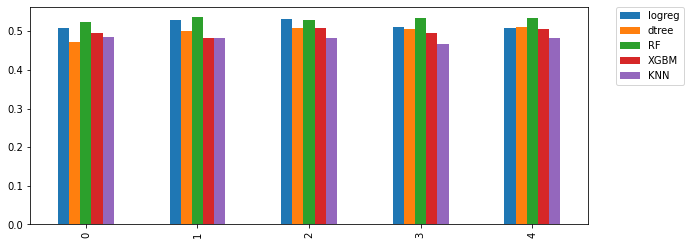

In [ ]:
results_df = pd.DataFrame({'logreg':logreg_scores, 'dtree': dtree_scores,'RF': RF_scores,'XGBM': XGBM_scores,'KNN': KNN_scores})
results_df.plot(y=["logreg", "dtree","RF","XGBM","KNN"], kind="bar",figsize=(10, 4), legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# dtree=DecisionTreeClassifier(min_samples_leaf=25, min_samples_split=25)
# dtree.fit(df_train, df_y)
# from sklearn import tree
# decision_tree = tree.export_graphviz(dtree,out_file='tree.dot',feature_names=df_train.columns,max_depth=2,filled=True)
# !dot -Tpng tree.dot -o tree.png

In [ ]:
model =XGBClassifier(random_state=101)
parameter_grid = {'max_depth' : [4,10,25],'n_estimators': [50,100,150]}
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(df_train, df_y)
randomsearch.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'max_depth': 4, 'n_estimators': 150}

In [ ]:
#creating a decision tree instance with random search hyperparameters
model = XGBClassifier(random_state=101, n_estimators=150, max_depth=4)
model.fit(df_train, df_y)
pred=model.predict(df_test)
#clf.score(df_test, test_y)

In [ ]:
model =RandomForestClassifier(random_state=101)
parameter_grid = {'max_depth' : [5,8,9,10],'n_estimators': [40,45,50,55]}
randomsearch = RandomizedSearchCV(estimator=model, param_distributions=parameter_grid, n_iter= 10, cv=5)
randomsearch.fit(df_train, df_y)
randomsearch.best_params_


{'max_depth': 9, 'n_estimators': 55}

In [ ]:
#creating a decision tree instance with random search hyperparameters
model = RandomForestClassifier(random_state=101, n_estimators=55, max_depth=9)
model.fit(df_train, df_y)
pred=model.predict(df_test)
#clf.score(df_test, test_y)

In [ ]:
sub = pd.DataFrame({'ID': sub_id, 'Segmentation': pred})
sub=sub.reindex(columns=["ID","Segmentation"])

filename = 'submission_RF.csv'
sub.to_csv(filename, index=False)

In [ ]:
# from pprint import pprint
# # Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 55,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(df_train, df_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               